# **Business Understanding**



### **Context**

Industri ritel, khususnya sektor supermarket, mengalami pergeseran yang signifikan karena perubahan perilaku dan preferensi konsumen. Dengan meningkatnya e-commerce, supermarket menghadapi tantangan dalam mempertahankan dan menarik pelanggan. Memahami perilaku dan preferensi pelanggan sangat penting bagi supermarket untuk tetap kompetitif di pasar dan memastikan kepuasan pelanggan.

### **Problem Statement**

Supermarket ini menghadapi penurunan retensi pelanggan dan peningkatan tingkat pengabaian keranjang belanja. Hal ini menyebabkan penurunan penjualan dan kepuasan pelanggan secara keseluruhan. Memahami pendorong utama perilaku dan preferensi pelanggan sangat penting untuk meningkatkan retensi pelanggan, meningkatkan penjualan, dan meningkatkan pengalaman pelanggan secara keseluruhan. Supermarket ini berusaha menghadapi persaingan dengan menciptakan hybrid transactions dimana pelanggan dapat berbelanja dengan pergi ke toko maupun beli di web dapat dilakukan sekaligus.

### **Goals**

- Mengurangi tingkat pengabaian keranjang belanja sebesar 20% di kuartal berikutnya.
- Mengidentifikasi segmen pelanggan dengan potensi tertinggi untuk peluang upselling (Diskon) dan cross-selling (Gratis Barang).

### **Analytical Aproach**

- Segmentasi Pelanggan: <br>Memanfaatkan algoritme pengelompokan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian, demografi, dan preferensi mereka. Hal ini akan memungkinkan identifikasi kelompok pelanggan yang berbeda dengan kebutuhan dan preferensi tertentu.
- Analisis Keranjang Pasar: <br>Menganalisis pola pembelian pelanggan untuk mengidentifikasi produk yang sering dibeli bersama. Hal ini akan membantu dalam menciptakan bundel produk dan promosi yang ditargetkan untuk mendorong penjualan silang dan meningkatkan nilai transaksi rata-rata.

### **Business Metrics**

- Tingkat Retensi Pelanggan: <br>Persentase pelanggan yang dipertahankan selama periode tertentu.
- Tingkat Pengabaian Keranjang Belanja: <br>Persentase keranjang belanja yang ditinggalkan dibandingkan dengan jumlah total transaksi yang dilakukan.
- Nilai Transaksi Rata-rata: <br>Jumlah rata-rata yang dibelanjakan oleh pelanggan per transaksi.
Dengan berfokus pada area dan metrik utama ini, supermarket dapat lebih memahami pelanggannya, meningkatkan retensi pelanggan, dan meningkatkan pengalaman berbelanja secara keseluruhan, yang mengarah pada peningkatan penjualan dan loyalitas pelanggan.

The dataset contains `2240 samples`. Contains `28 features` and `1 target boolean` variable `"Response"` :

**Accepted/Responses Campaign**

- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response (target)` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained in the previous 2 years

**Customer Information**

- `ID` - Customer's id
- `Year_Birth` - Customer's year of birth
- `Education` - customer’s level of education
- `Marital_Status` - customer’s marital status
- `Kidhome` - number of small children in customer’s household
- `Teenhome` - number of teenagers in customer’s household
- `Income` - customer’s yearly household income
- `Dt_Customer` - date of customer’s enrolment with the company
- `Recency` - number of days since the last purchase

**Sales Product Type**

- `MntFishProducts` - amount spent on fish products in the last 2 years
- `MntMeatProducts` - amount spent on meat products in the last 2 years
- `MntFruits` - amount spent on fruits products in the last 2 years
- `MntSweetProducts` - amount spent on sweet products in the last 2 years
- `MntWines` - amount spent on wine products in the last 2 years
- `MntGoldProds` - amount spent on gold products in the last 2 years

**Number of Purchases per Type**

- `NumDealsPurchases` - number of purchases made with discount
- `NumCatalogPurchases` - number of purchases made using catalogue
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebPurchases` - number of purchases made through company’s web site
- `NumWebVisitsMonth` - number of visits to company’s web site in the last month

**Cost and Revenue**

- `Z_CostContact = 3` (Cost to contact a customer)
- `Z_Revenue = 11` (Revenue after client accepting campaign)

# **Data Collection**

In [1]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 90)

# Read in the datav
df = pd.read_csv('../src/data/raw/Supermarket Customers.csv', delimiter='\t')
df.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


# **Data Preparation**

## Data Understanding

In [2]:
df.describe()

,id,yearbirth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
df.columns

Index(['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [4]:
# show data description
print(f"Jumlah Baris,Kolom : {df.shape}")
cols = ['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']
pd.DataFrame({
    'data_type': df[cols].dtypes.values,
    'null_value': df[cols].isna().sum(),
    'Percentange': df[cols].isna().mean().values * 100,
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)

Jumlah Baris,Kolom : (2240, 29)


,data_type,null_value,Percentange,n_unique,sample_unique
id,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 256..."
yearbirth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1..."
education,object,0,0.000000,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
maritalstatus,object,0,0.000000,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
income,float64,24,1.071429,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648..."
kidhome,int64,0,0.000000,3,"[0, 1, 2]"
teenhome,int64,0,0.000000,3,"[0, 1, 2]"
dtcustomer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 0..."
recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0..."
mntwines,int64,0,0.000000,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86..."


In [5]:
df.dtypes

id                       int64
yearbirth                int64
education               object
maritalstatus           object
income                 float64
kidhome                  int64
teenhome                 int64
dtcustomer              object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldproducts          int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

## Replace Values In Some Columns

- `Education` (Replace 2n Cycle With Master). Reference [Here](https://www.ehea.info/page-three-cycle-system)

In [6]:
# Change the value of 2n Cycle to Master
df.loc[df['education'] == '2n Cycle', 'education'] = 'Master'

- `Marital_Status` (Make Value Only 2, Partner And Single)

In [7]:
df.maritalstatus = df.maritalstatus.replace({'Together': 'Partner',
                                            'Married': 'Partner',
                                            'Divorced': 'Single',
                                            'Widow': 'Single', 
                                            'Alone': 'Single',
                                            'Absurd': 'Single',
                                            'YOLO': 'Single'})

## Data Cleaning

- Handling Wrong Datatype

CHANGE dtcustomer TO DATETIME

In [8]:
df['dtcustomer'] = pd.to_datetime(df['dtcustomer'], format='%d-%m-%Y')

- Handling Invalid Values

Convert id column size same with convert id that size lower than 5 to random number between 12000, 14001

In [9]:
import random

df['id'] = df['id'].astype(str)

list_values_string_same5 = df.loc[df['id'].str.len() == 5, 'id'].unique()
list_values_string_below5 = df.loc[df['id'].str.len() < 5, 'id'].unique()

# Generate unique random integers between 12000 and 14000
random_integers = random.sample(range(12000, 14001), len(list_values_string_below5))

# Create a dictionary to map old IDs to new random integers
id_map = dict(zip(list_values_string_below5, random_integers))

# Replace old IDs with new random integers in 'id' column
df['id'] = df['id'].replace(id_map)

# Convert 'id' column from str to int
df['id'] = df['id'].astype(int)

- Handling Missing Values

Before That I Will Check Its Data Distribution

In [10]:
# Get Data With Numerical Columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['yearbirth', 'income', 'kidhome', 'teenhome', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

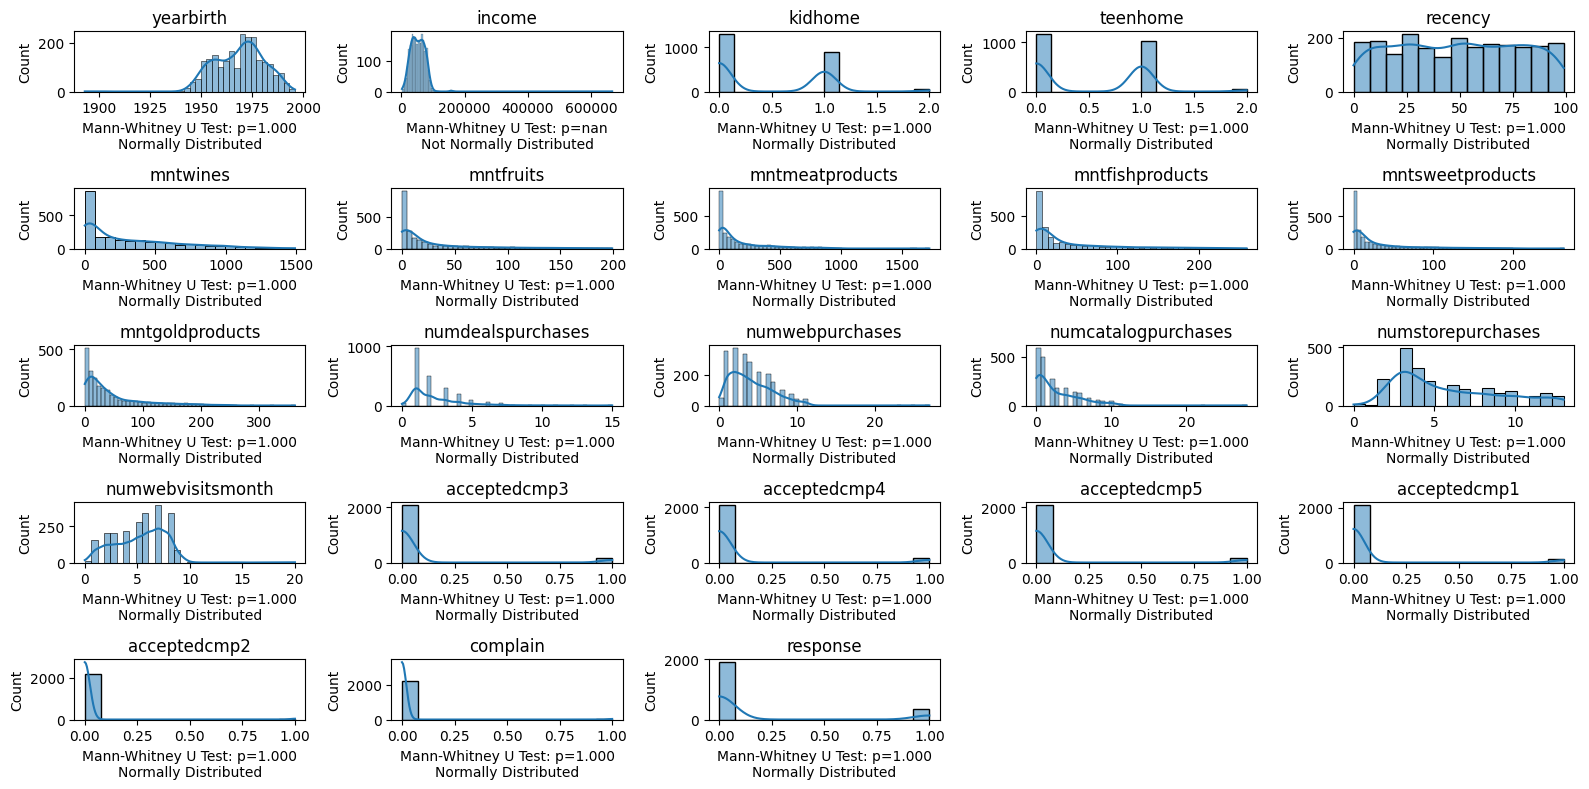

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Assuming 'df' is your DataFrame
columns = ['yearbirth', 'income', 'kidhome', 'teenhome', 'recency', 'mntwines',
           'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
           'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
           'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
           'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
           'acceptedcmp2', 'complain', 'response']

# Create a subplot grid
fig, axes = plt.subplots(5, 5, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Perform the Mann-Whitney U test for each column and create histograms
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, label=column, ax=ax)
    ax.set_title(column)

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(df[column], df[column])

    if p > 0.05:
        ax.set_xlabel(
            f"Mann-Whitney U Test: p={p:.3f}\nNormally Distributed")
    else:
        ax.set_xlabel(
            f"Mann-Whitney U Test: p={p:.3f}\nNot Normally Distributed")

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Axes: >

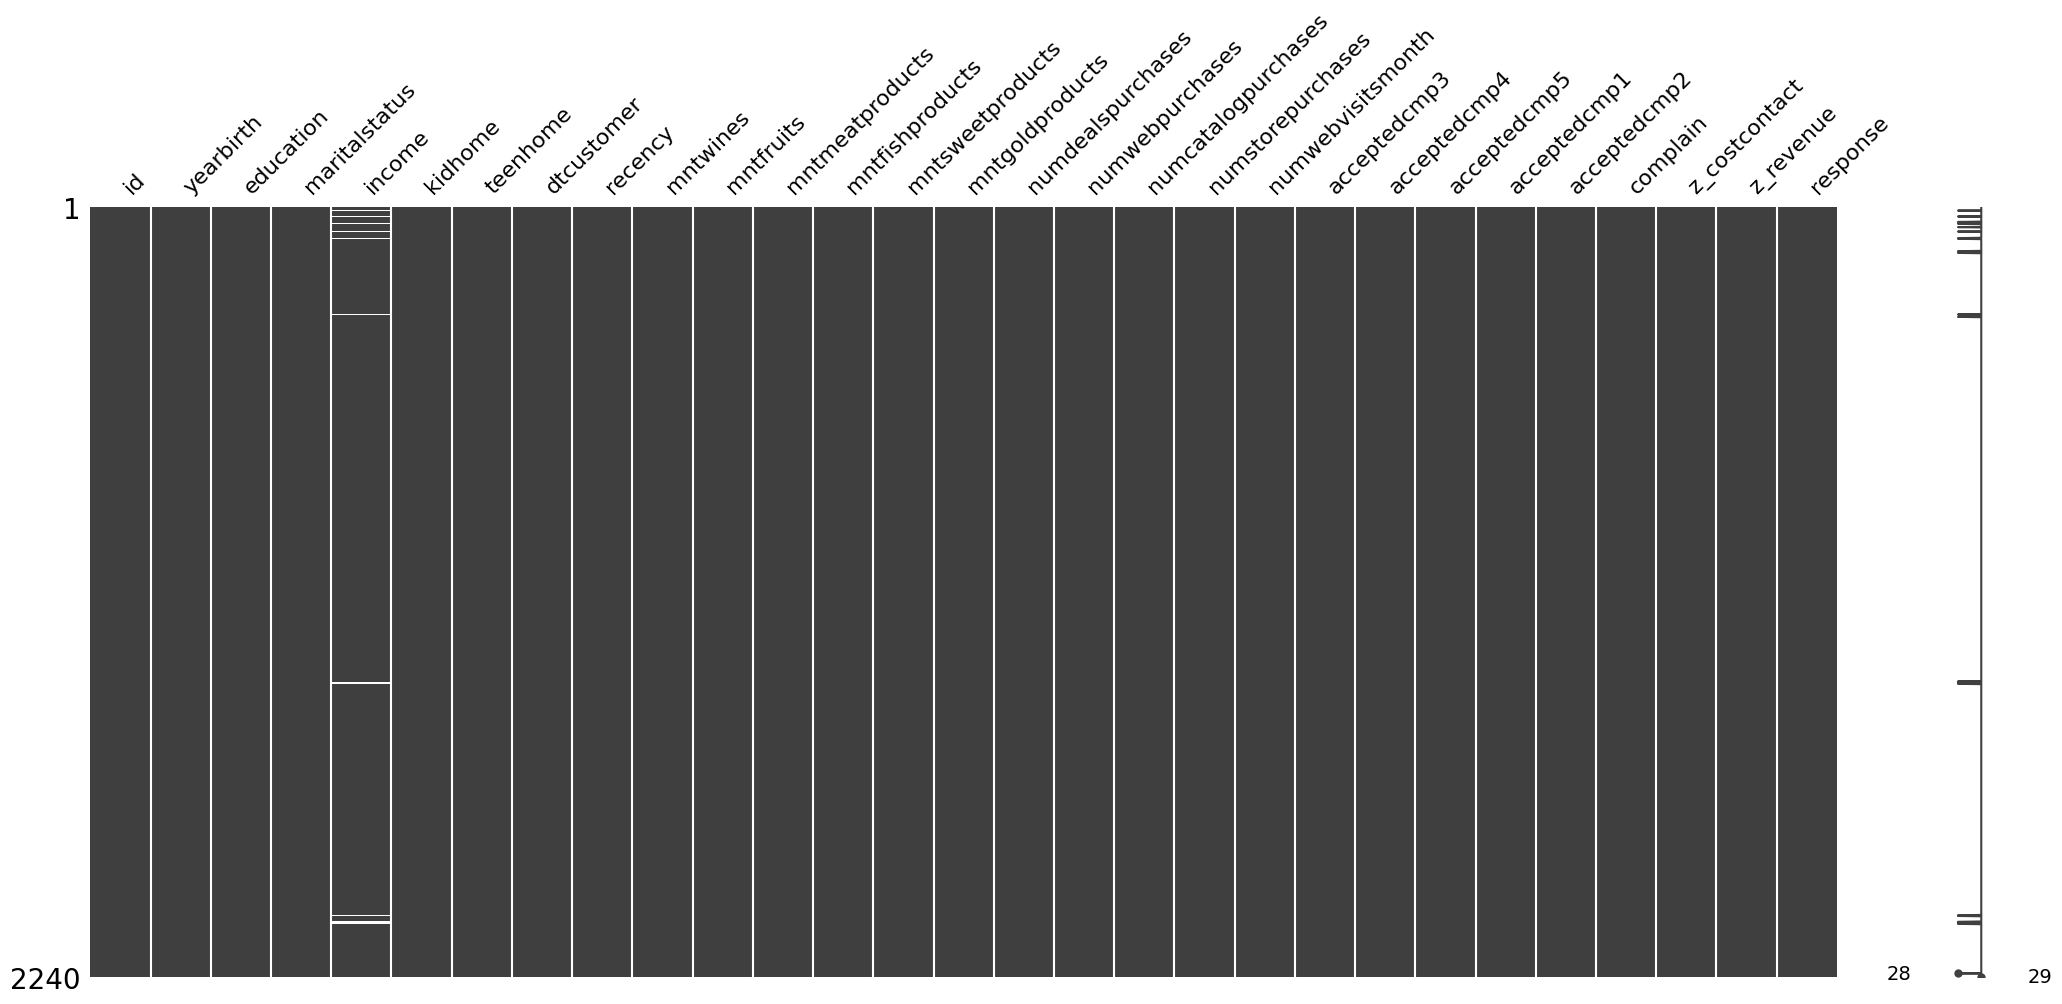

In [12]:
msno.matrix(df)

Karena Kolom Income Tidak Terdistribusi Normal, Maka Saya Akan Menggunakan Median Untuk Mengisi Missing Value

In [13]:
# fill missing values from income original column with median value from income median column
df['income'] = df['income'].fillna(df.groupby(['education', 'maritalstatus'])['income'].transform('median'))

<Axes: >

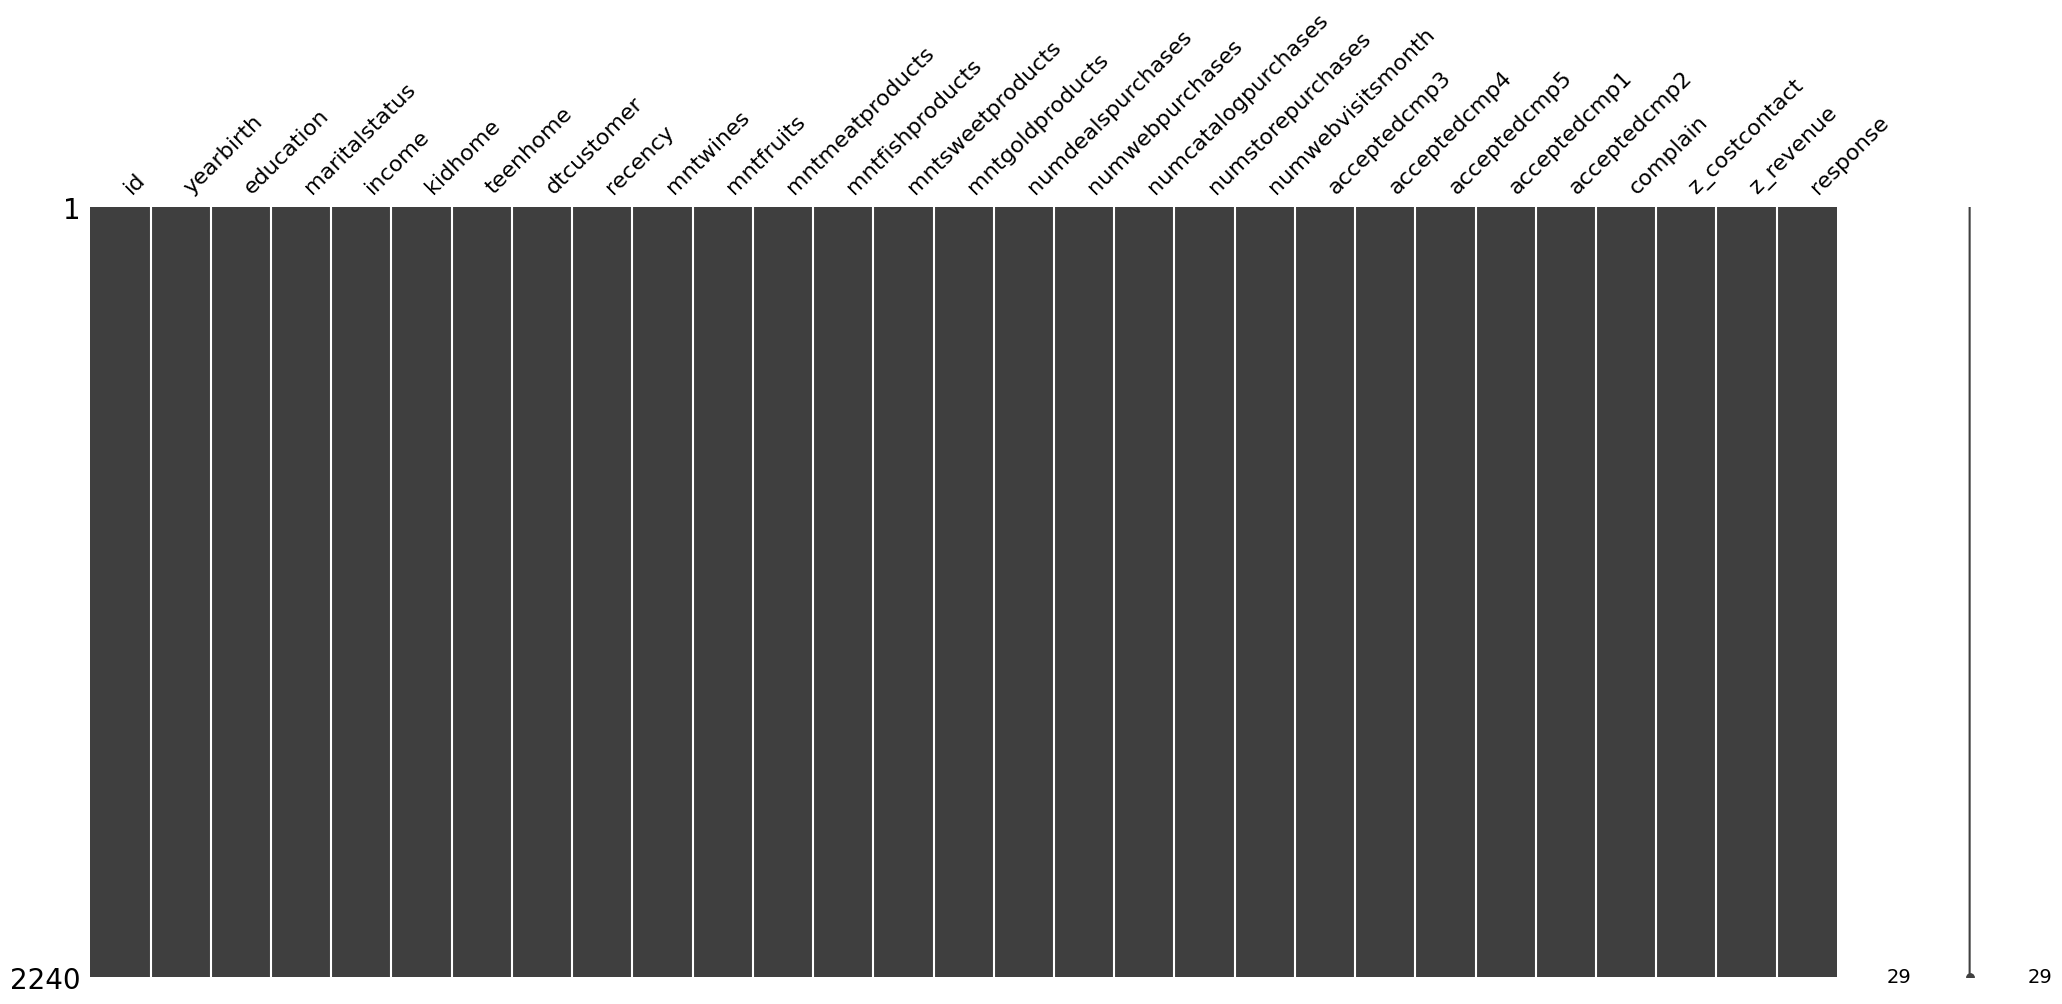

In [14]:
msno.matrix(df)

- Handling Outlier<br>

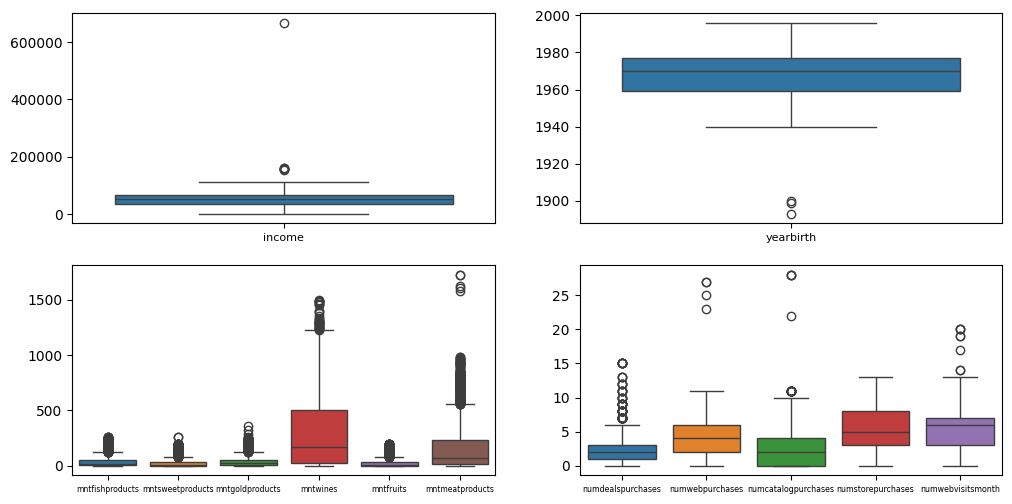

In [15]:
data_presentation = df[['yearbirth', 'income','recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldproducts', 'numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
box_plot1 = sns.boxplot(data=data_presentation[['income']])
box_plot1.set_xticklabels(box_plot1.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 2)
box_plot2 = sns.boxplot(data=data_presentation[['yearbirth']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 3)
box_plot3 = sns.boxplot(data=data_presentation[['mntfishproducts', 'mntsweetproducts','mntgoldproducts','mntwines','mntfruits','mntmeatproducts']])
box_plot3.set_xticklabels(box_plot3.get_xticklabels(), fontsize=5.5)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 4)
box_plot4 = sns.boxplot(data=data_presentation[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']])
box_plot4.set_xticklabels(box_plot4.get_xticklabels(), fontsize=5.7)  # Adjust the fontsize as per your requirement

plt.show()

`yearbirth` (Replace With Median Based On 'Education' And 'Marital_Status')

In [16]:
# replace the outlier with the median from the combination of education and marital status
df.loc[df['yearbirth'] < 1935, 'yearbirth'] = df.groupby(['education', 'maritalstatus'])['yearbirth'].transform('median')

`income` (Replace With Median Based On 'Education' And 'Marital_Status')

In [17]:
# fill missing values from income original column with median value from income median column
df.loc[df['income'] > 153000, 'income'] = df.groupby(['education', 'maritalstatus'])['income'].transform('median')

`mntcolumns` (Replace With Max Value From Non Outlier Mnt Columns)

mntwines

In [18]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntwines = find_non_outlier(df, 'mntwines')
max_mntwines = mntwines['mntwines'].max()

# Replace Outlier With Max Value
df.loc[df['mntwines'] > max_mntwines, 'mntwines'] = max_mntwines

mntfruits

In [19]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntfruits = find_non_outlier(df, 'mntfruits')
max_mntfruits = mntfruits['mntfruits'].max()

# Replace Outlier With Max Value
df.loc[df['mntfruits'] > max_mntfruits, 'mntfruits'] = max_mntfruits

mntmeatproducts

In [20]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntmeatproducts = find_non_outlier(df, 'mntmeatproducts')
max_mntmeatproducts = mntmeatproducts['mntmeatproducts'].max()

# Replace Outlier With Max Value
df.loc[df['mntmeatproducts'] > max_mntmeatproducts, 'mntmeatproducts'] = max_mntmeatproducts

mntfishproducts

In [21]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntfishproducts = find_non_outlier(df, 'mntfishproducts')
max_mntfishproducts = mntfishproducts['mntfishproducts'].max()

# Replace Outlier With Max Value
df.loc[df['mntfishproducts'] > max_mntfishproducts, 'mntfishproducts'] = max_mntfishproducts

mntsweetproducts

In [22]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntsweetproducts = find_non_outlier(df, 'mntsweetproducts')
max_mntsweetproducts = mntsweetproducts['mntsweetproducts'].max()

# Replace Outlier With Max Value
df.loc[df['mntsweetproducts'] > max_mntsweetproducts, 'mntsweetproducts'] = max_mntsweetproducts

mntgoldproducts

In [23]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

mntgoldproducts = find_non_outlier(df, 'mntgoldproducts')
max_mntgoldproducst = mntgoldproducts['mntgoldproducts'].max()

# Replace Outlier With Max Value
df.loc[df['mntgoldproducts'] > max_mntgoldproducst, 'mntgoldproducts'] = max_mntgoldproducst

`numcolumns` (Replace With Max Value From Non Outlier Num Columns)

numdealspurchases

In [24]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

numdealspurchases = find_non_outlier(df, 'numdealspurchases')
max_numdealspurchases = numdealspurchases['numdealspurchases'].max()

# Replace Outlier With Max Value
df.loc[df['numdealspurchases'] > max_numdealspurchases, 'numdealspurchases'] = max_numdealspurchases

numcatalogpurchases

In [25]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

numcatalogpurchases = find_non_outlier(df, 'numcatalogpurchases')
max_numcatalogpurchases = numcatalogpurchases['numcatalogpurchases'].max()

# Replace Outlier With Max Value
df.loc[df['numcatalogpurchases'] > max_numcatalogpurchases, 'numcatalogpurchases'] = max_numcatalogpurchases

numwebpurchases

In [26]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

numwebpurchases = find_non_outlier(df, 'numwebpurchases')
max_numwebpurchases = numwebpurchases['numwebpurchases'].max()

# Replace Outlier With Max Value
df.loc[df['numwebpurchases'] > max_numwebpurchases, 'numwebpurchases'] = max_numwebpurchases

numwebvisitsmonth

In [27]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

numwebvisitsmonth = find_non_outlier(df, 'numwebvisitsmonth')
max_numwebvisitsmonth = numwebvisitsmonth['numwebvisitsmonth'].max()

# Replace Outlier With Max Value
df.loc[df['numwebvisitsmonth'] > max_numwebvisitsmonth, 'numwebvisitsmonth'] = max_numwebvisitsmonth

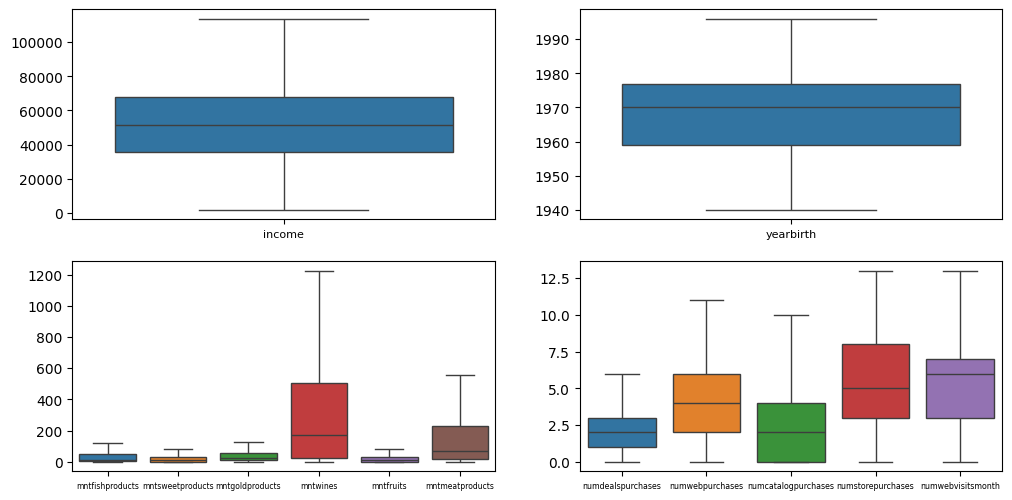

In [28]:
data_presentation = df[['yearbirth', 'income','recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldproducts', 'numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
box_plot1 = sns.boxplot(data=data_presentation[['income']])
box_plot1.set_xticklabels(box_plot1.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 2)
box_plot2 = sns.boxplot(data=data_presentation[['yearbirth']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 3)
box_plot3 = sns.boxplot(data=data_presentation[['mntfishproducts', 'mntsweetproducts','mntgoldproducts','mntwines','mntfruits','mntmeatproducts']])
box_plot3.set_xticklabels(box_plot3.get_xticklabels(), fontsize=5.5)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 4)
box_plot4 = sns.boxplot(data=data_presentation[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']])
box_plot4.set_xticklabels(box_plot4.get_xticklabels(), fontsize=5.7)  # Adjust the fontsize as per your requirement

plt.show()

- Handling Duplicate Values

In [29]:
# check for duplicate data excluding 'id' column using difference method
duplicate_rows = df[df.duplicated(subset=df.columns.difference(['id']))]

# sort by yearbirth column
duplicate_rows = duplicate_rows.sort_values(by=['yearbirth', 'education', 'maritalstatus', 'income'])

# print the duplicate rows
print(f"Jumlah Data Asli : {len(df)}")
print(f"Jumlah Data Duplikat : {len(duplicate_rows)}")
print(f"Percentage : {len(duplicate_rows)/len(df)*100:.2f}%")

# drop duplicate data
df = df.drop_duplicates(subset=df.columns.difference(['id']))

Jumlah Data Asli : 2240
Jumlah Data Duplikat : 185
Percentage : 8.26%


## Data Binning

To Find More How I Binning The Data There is A File Name **Preparation.ipynb**<br><br>
_This is Only The Summary of The Data Binning_

- `age`

In [30]:
# add age column based on yearbirth column and its position next to yearbirth column
df.insert(2, 'age', 2015-df['yearbirth'])

- `mnttotal`

In [31]:
# add new column mnttotal which is the sum of mntwines, mntfruits, mntmeatproducts, mntfishproducts, mntsweetproducts, mntgoldproducts
df.insert(16, 'mnttotal', df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldproducts'])

- `totalpurchases`

In [32]:
# add new column totalpurchases which is the sum of numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases
df.insert(22, 'totalpurchases', df['numdealspurchases'] + df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'])

- `categorical_age`

In [33]:
# add new column categorical_age which is the age group of each customer
df.insert(3, 'categorical_age', pd.cut(df['age'], bins=[-np.inf, 35, 55, 90], labels=['0-35', '36-55', '56-90']))

- `categorical_income`

In [34]:
# Creating income segments based on quartiles
df.insert(7, 'categorical_income', pd.qcut(df['income'], q=4, labels=['Lowest', 'Low', 'High', 'Highest']))

- `totalchild`

In [35]:
# add new column totalchild which is the sum of kidhome and teenhome
df.insert(10, 'totalchild', df['kidhome'] + df['teenhome'])

- `mntwines_category`

In [36]:
# add new column mntwines_category based on mntwines
df.insert(14, 'mntwines_category', pd.cut(df['mntwines'], bins=[-np.inf, 150, 500, 1250], labels=['0-150', '151-500', '501-1250']))

- `mntfruits_category`

In [37]:
# add new column mntfruits_category based on mntwines
df.insert(16, 'mntfruits_category', pd.cut(df['mntfruits'], bins=[-np.inf, 15, 50, 100], labels=['0-15', '16-50', '51-100']))

- `mntmeatproducts_category`

In [38]:
# add new column mntmeatproducts_category based on mntmeatproducts where max value = 1725
df.insert(18, 'mntmeatproducts_category', pd.cut(df['mntmeatproducts'], bins=[-np.inf, 50, 250, 600], labels=['0-50', '51-250', '251-600']))

- `mntfishproducts_category`

In [39]:
# add new column mntfishproducts_category based on mntfishproducts where max value = 259
df.insert(20, 'mntfishproducts_category', pd.cut(df['mntfishproducts'], bins=[-np.inf, 30, 80, 150], labels=['0-30', '31-80', '81-150']))

- `mntsweetproducts_category`

In [40]:
# add new column mntsweetproducts_category based on mntsweetproducts where max value = 263
df.insert(22, 'mntsweetproducts_category', pd.cut(df['mntsweetproducts'], bins=[-np.inf, 30, 60, 100], labels=['0-30', '31-60', '61-100']))

- `mntgoldprods_category`

In [41]:
# add new column mntgoldproducts_category based on mntgoldproducts where max value = 362
df.insert(24, 'mntgoldproducts_category', pd.cut(df['mntgoldproducts'], bins=[-np.inf, 30, 80, 150], labels=['0-30', '31-80', '81-150']))

- `numdealspurchases_category`

In [42]:
# add new column numdealspurchases_category based on numdealspurchases where max value = 15
df.insert(27, 'numdealspurchases_category', pd.cut(df['numdealspurchases'], bins=[-np.inf, 1, 4, 10], labels=['0-1', '2-4', '5-10']))

- `numwebpurchases_category`

In [43]:
# add new column numwebpurchases_category based on numwebpurchases where max value = 27
df.insert(29, 'numwebpurchases_category', pd.cut(df['numwebpurchases'], bins=[-np.inf, 2, 6, 15], labels=['0-2', '3-6', '7-15']))

- `numcatalogpurchases_category`

In [44]:
# add new column numcatalogpurchases_category based on numcatalogpurchases where max value = 28
df.insert(31, 'numcatalogpurchases_category', pd.cut(df['numcatalogpurchases'], bins=[-np.inf, 2, 6, 12], labels=['0-2', '3-6', '7-12']))

- `numstorepurchases_category`

In [45]:
# add new column numstorepurchases_category based on numstorepurchases where max value = 13
df.insert(33, 'numstorepurchases_category', pd.cut(df['numstorepurchases'], bins=[-np.inf, 3, 8, 15], labels=['0-3', '4-8', '9-15']))

- `numwebvisitmonth_category`

In [46]:
# add new column numwebvisitsmonth_category based on numwebvisitsmonth where max value = 20
df.insert(35, 'numwebvisitsmonth_category', pd.cut(df['numwebvisitsmonth'], bins=[-np.inf, 3, 8, 15], labels=['0-3', '4-8', '9-15']))

Fix Column Position

In [47]:
# Move acceptedcmp1 and acceptedcmp2 to before acceptedcmp3
df = df[['id', 'yearbirth', 'age', 'categorical_age', 'education', 'maritalstatus', 'income', 'categorical_income', 'kidhome', 'teenhome', 'totalchild', 'dtcustomer', 'recency', 'mntwines', 'mntwines_category', 'mntfruits', 'mntfruits_category', 'mntmeatproducts', 'mntmeatproducts_category', 'mntfishproducts', 'mntfishproducts_category', 'mntsweetproducts', 'mntsweetproducts_category', 'mntgoldproducts', 'mntgoldproducts_category', 'mnttotal', 'numdealspurchases', 'numdealspurchases_category', 'numwebpurchases', 'numwebpurchases_category', 'numcatalogpurchases', 'numcatalogpurchases_category', 'numstorepurchases', 'numstorepurchases_category', 'numwebvisitsmonth', 'numwebvisitsmonth_category', 'totalpurchases', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'z_costcontact', 'z_revenue', 'response']] 

- `acceptedcmp1_category`

In [48]:
# add new column acceptedcmp1_category based on acceptedcmp1 if acceptedcmp1 = 0 then "Reject" else "Accept"
df.insert(38, 'acceptedcmp1_category', df['acceptedcmp1'].apply(lambda x: 'Reject' if x == 0 else 'Accept'))

- `acceptedcmp2345_category and response_category`

In [49]:
# Define a function to map acceptedcmp values to categories
def map_acceptedcmp(x):
    if x == 1:
        return 'Accept'
    elif x == 0:
        return 'Reject'
    else:
        return 'Accept more than once'

df.insert(40, 'acceptedcmp2_category', df.apply(lambda row: map_acceptedcmp(row['acceptedcmp2']) if row['acceptedcmp1'] == 0 else 'Accept more than once', axis=1))
df.insert(42, 'acceptedcmp3_category', df.apply(lambda row: map_acceptedcmp(row['acceptedcmp3']) if row['acceptedcmp1'] == 0 and row['acceptedcmp2'] == 0 else 'Accept more than once', axis=1))
df.insert(44, 'acceptedcmp4_category', df.apply(lambda row: map_acceptedcmp(row['acceptedcmp4']) if row['acceptedcmp1'] == 0 and row['acceptedcmp2'] == 0 and row['acceptedcmp3'] == 0 else 'Accept more than once', axis=1))
df.insert(46, 'acceptedcmp5_category', df.apply(lambda row: map_acceptedcmp(row['acceptedcmp5']) if row['acceptedcmp1'] == 0 and row['acceptedcmp2'] == 0 and row['acceptedcmp3'] == 0 and row['acceptedcmp4'] == 0 else 'Accept more than once', axis=1))
df.insert(51, 'response_category', df.apply(lambda row: map_acceptedcmp(row['response']) if row['acceptedcmp1'] == 0 and row['acceptedcmp2'] == 0 and row['acceptedcmp3'] == 0 and row['acceptedcmp4'] == 0 and row['acceptedcmp5'] == 0 else 'Accept more than once', axis=1))

- `totalacceptedcmp`

In [50]:
# add new column totalacceptedcmp which is sum of acceptedcmp1, acceptedcmp2, acceptedcmp3, acceptedcmp4, acceptedcmp5, and response
df.insert(52, 'totalacceptedcmp', df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] + df['response'])

Drop Unnecessary Column

In [51]:
# Drop Column that not needed
df = df.drop(['z_costcontact','z_revenue'], axis=1)

In [52]:
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,acceptedcmp1,acceptedcmp1_category,acceptedcmp2,acceptedcmp2_category,acceptedcmp3,acceptedcmp3_category,acceptedcmp4,acceptedcmp4_category,acceptedcmp5,acceptedcmp5_category,complain,response,response_category,totalacceptedcmp
0,13656,1957,58,56-90,Graduation,Single,58138.0,High,0,0,0,2012-09-04,58,635,501-1250,81,51-100,546,251-600,120,81-150,81,61-100,88,81-150,1551,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,0,Reject,0,Reject,0,Reject,0,Reject,0,Reject,0,1,Accept,1


In [53]:
# Save To CSV
df.to_csv('../src/data/clean/Supermarket Customers.csv', index=False)